<a href="https://colab.research.google.com/github/Manpreethub/yolo-model_MK/blob/main/Archaelogical_site__mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1) Install packages
!pip install ultralytics --quiet
!pip install opencv-python-headless matplotlib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.6 MB/s eta 0:00:00


In [ ]:
# 2) Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# 3) Set dataset root
import os, glob, yaml

base_path = "/content/drive/MyDrive/yolo/vegetation_segmentation.v2i.yolov8"
print("Dataset folders:", os.listdir(base_path))


Dataset folders: ['README.roboflow.txt', 'README.dataset.txt', 'valid', 'train', 'test', 'data.yaml']


In [ ]:
# 4) Inspect labels
train_labels = glob.glob(os.path.join(base_path, "train/labels/*.txt"))
classes = set()
for label_file in train_labels:
    with open(label_file, "r") as f:
        for line in f.readlines():
            classes.add(int(line.split()[0]))
print("Detected classes:", classes)

Detected classes: {0}


In [ ]:
# 5) Define correct class mapping
# 🚨 Update according to your dataset
class_map = {
    0: "Vegetation",
    1: "Soil",
    2: "Water"
}

In [ ]:
# 6) Build data.yaml
data_yaml = {
    'path': base_path,
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'nc': len(class_map),
    'names': [class_map[i] for i in range(len(class_map))]
}

yaml_file = os.path.join(base_path, "data.yaml")
with open(yaml_file, "w") as f:
    yaml.dump(data_yaml, f)
print("✅ data.yaml created at", yaml_file)

✅ data.yaml created at /content/drive/MyDrive/yolo/vegetation_segmentation.v2i.yolov8/data.yaml


In [ ]:
# 7) Train YOLOv8 segmentation
from ultralytics import YOLO

model = YOLO("yolov8m-seg.pt")   # medium model for better accuracy

model.train(
    data=yaml_file,
    epochs=60,
    batch=16,
    imgsz=640,
    device=0,
    project="/content/drive/MyDrive/yolo/yolov8_results",
    name="vegetation_seg",
    exist_ok=True,
    lr0=0.001,              # base learning rate
    lrf=0.01,               # final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    augment=True,           # enable augmentations
    hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,   # color aug
    degrees=15, translate=0.1, scale=0.9, shear=0.1, perspective=0.0,
    flipud=0.2, fliplr=0.5, mosaic=1.0, mixup=0.2
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.206 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/yolo/vegetation_segmentation.v2i.yolov8/data.yaml, degrees=15, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.2, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, i

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cf95ef53bf0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [ ]:
# 8) Validate model on test set
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/yolo/yolov8_results/vegetation_seg/weights/best.pt")
metrics = model.val(
    data=yaml_file,
    split="test",
    imgsz=640,
    batch=16,
    device=0
)
print("📊 Validation Metrics:", metrics)

Ultralytics 8.3.206 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-seg summary (fused): 105 layers, 27,224,121 parameters, 0 gradients, 104.3 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.4±0.2 MB/s, size: 141.1 KB)
val: Scanning /content/drive/MyDrive/yolo/vegetation_segmentation.v2i.yolov8/test/labels.cache... 27 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 27/27 30.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 0.2it/s 10.6s
                   all         27         80      0.728      0.637       0.66      0.434      0.704      0.624      0.675      0.374
            Vegetation         25         80      0.728      0.637       0.66      0.434      0.704      0.624      0.675      0.374
Speed: 9.3ms preprocess, 36.4ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to /content/runs/segment/val
📊 Validatio


image 1/1 /content/drive/MyDrive/yolo/vegetation_segmentation.v2i.yolov8/test/images/1-3-13_png.rf.bf6a25b467427a0ea2a9fd37e739b56e.jpg: 640x640 13 Vegetations, 44.7ms
Speed: 2.9ms preprocess, 44.7ms inference, 23.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/segment/predict


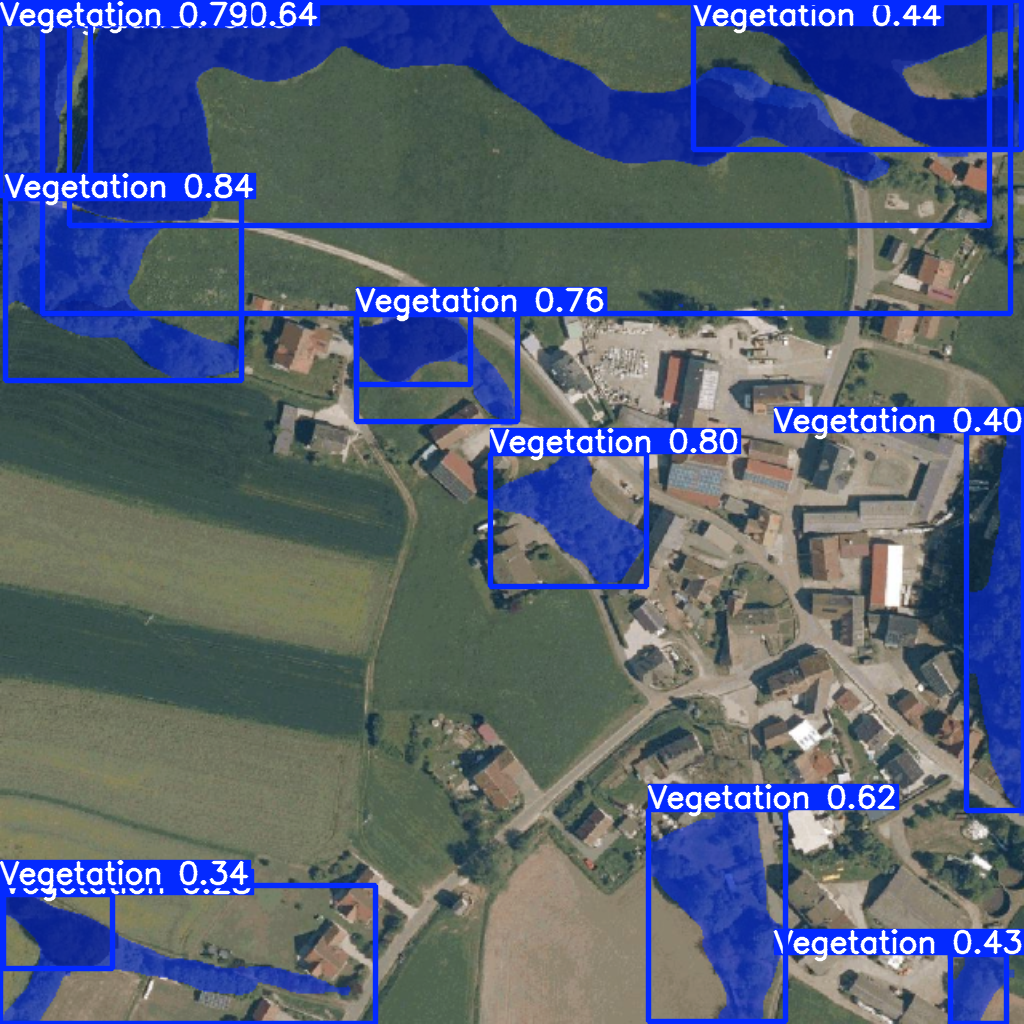

In [ ]:
# 9) Test prediction
sample_image = glob.glob(os.path.join(base_path, "test/images/*.jpg"))[0]
result = model.predict(
    source=sample_image,
    save=True,
    imgsz=640,
    conf=0.25,
    device=0
)
result[0].show()